In [1]:
#! pip install data_describe

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#import data_describe as mw

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [4]:
# /home/jupyter/awesome-data-science-models/lending-club/EDA
!gsutil cp gs://amazing-public-data/lending_club/lending_club_data.tsv .

Copying gs://amazing-public-data/lending_club/lending_club_data.tsv...
/ [1 files][  4.2 MiB/  4.2 MiB]                                                
Operation completed over 1 objects/4.2 MiB.                                      


In [5]:
dtypes={
        "Id": "int64",
        "is_bad": "int64",
        "emp_length": "float64",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "purpose_cat": "category",
        "addr_state": "category",
        "debt_to_income": "float64",
        "delinq_2yrs": "float64",
        "earliest_cr_line": "str",
        "inq_last_6mths": "float64",
        "mths_since_last_delinq": "float64",
        "mths_since_last_record": "float64",
        "open_acc": "float64",
        "pub_rec": "float64",
        "revol_bal": "float64",
        "revol_util": "float64",
        "total_acc": "float64",
        "mths_since_last_major_derog": "int64",
        "policy_code": "category"
    }

df = pd.read_csv("./lending_club_data.tsv",
                 sep="\t",
                 na_values={"emp_length": "na"},
                 keep_default_na=True,
                 usecols=dtypes.keys(),
                 dtype=dtypes)

In [6]:
df.shape

(10000, 21)

In [7]:
df.head()

,Id,is_bad,emp_length,home_ownership,annual_inc,verification_status,purpose_cat,addr_state,debt_to_income,delinq_2yrs,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code
0,1,0,10.0,MORTGAGE,50000.0,not verified,medical,TX,10.87,0.0,...,0.0,NaN,NaN,15.0,0.0,12087.0,12.1,44.0,1,PC4
1,2,0,1.0,RENT,39216.0,not verified,debt consolidation,KS,9.15,0.0,...,2.0,NaN,NaN,4.0,0.0,10114.0,64.0,5.0,2,PC1
2,3,0,4.0,RENT,65000.0,not verified,credit card,CA,11.24,0.0,...,0.0,NaN,NaN,4.0,0.0,81.0,0.6,8.0,3,PC4
3,4,0,10.0,MORTGAGE,57500.0,not verified,debt consolidation,NY,6.18,1.0,...,0.0,16.0,NaN,6.0,0.0,10030.0,37.1,23.0,2,PC2
4,5,0,10.0,MORTGAGE,50004.0,VERIFIED - income,debt consolidation,OH,19.03,0.0,...,4.0,NaN,NaN,8.0,0.0,10740.0,40.4,21.0,3,PC3


In [8]:
df.drop(['Id'], axis=1, inplace=True)

In [9]:
#mw.data_summary(df)

In [19]:
df_summary= pd.DataFrame(df.T.apply(lambda x: x.nunique(),axis=1))#.sort_values(ascending=False))
df_summary.columns=['Unique_values']
df_summary['data_type']=df.dtypes
df_summary.reset_index(drop=False,inplace=True)
df_summary.columns=['factors','Unique_values','data_type']
df_loan_null=pd.DataFrame(df.isnull().sum()*100 / len(df),columns=['Missing Value Percentage'])
df_loan_null.reset_index(drop=False,inplace=True)
df_loan_null.columns=['factors','Missing Value Percentage']
df_summary= pd.merge(df_summary,df_loan_null,on='factors')
df_summary = df_summary.sort_values('Missing Value Percentage',ascending=False).reset_index(drop=True)
df_summary

,factors,Unique_values,data_type,Missing Value Percentage
0,mths_since_last_record,94,float64,91.60
1,mths_since_last_delinq,91,float64,63.16
2,emp_length,13,float64,2.50
3,revol_util,1027,float64,0.26
4,inq_last_6mths,20,float64,0.05
5,open_acc,36,float64,0.05
6,total_acc,75,float64,0.05
7,pub_rec,4,float64,0.05
8,delinq_2yrs,10,float64,0.05
9,earliest_cr_line,463,object,0.05


In [22]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
is_bad,10000.0,NaN,NaN,NaN,0.1295,0.335769,0.0,0.0,0.0,0.0,1.0
emp_length,9750.0,NaN,NaN,NaN,4.988615,3.447625,1.0,2.0,4.0,9.0,33.0
home_ownership,10000,5,RENT,4745,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,9999.0,NaN,NaN,NaN,68203.011539,48590.252757,2000.0,40000.0,58000.0,82000.0,900000.0
verification_status,10000,3,not verified,4367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose_cat,10000,27,debt consolidation,4454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr_state,10000,50,CA,1748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
debt_to_income,10000.0,NaN,NaN,NaN,13.338704,6.754212,0.0,8.16,13.41,18.6925,29.99
delinq_2yrs,9995.0,NaN,NaN,NaN,0.148174,0.50627,0.0,0.0,0.0,0.0,11.0
earliest_cr_line,9995,463,11/1/00,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
bad_map = pd.DataFrame({'is_bad':[0,1], 'Bad Loan':['No', 'Yes']})

<AxesSubplot:xlabel='is_bad', ylabel='count'>

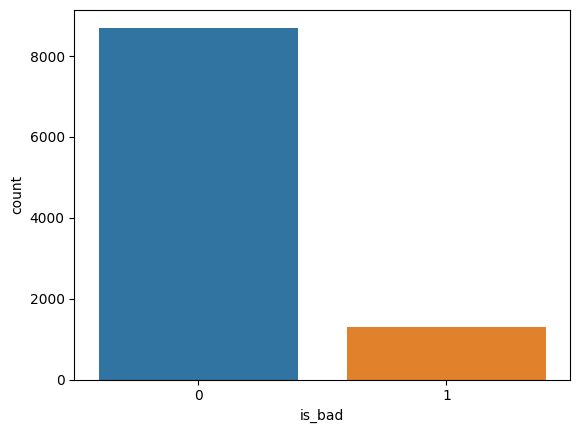

In [24]:
sns.countplot(x='is_bad', data=df.merge(bad_map))

In [25]:
df[['open_acc', 'annual_inc']].describe()

,open_acc,annual_inc
count,9995.000000,9999.000000
mean,9.334567,68203.011539
std,4.526590,48590.252757
min,1.000000,2000.000000
25%,6.000000,40000.000000
50%,9.000000,58000.000000
75%,12.000000,82000.000000
max,39.000000,900000.000000


# Inspection of high income applicants

In [26]:
df_high_income = df.loc[df.annual_inc > 600000]
df_high_income.head()

,is_bad,emp_length,home_ownership,annual_inc,verification_status,purpose_cat,addr_state,debt_to_income,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog,policy_code
240,0,10.0,RENT,900000.0,VERIFIED - income source,wedding,NY,1.04,3.0,11/1/99,0.0,5.0,NaN,6.0,0.0,301.0,13.1,22.0,3,PC3
1296,0,10.0,MORTGAGE,744000.0,VERIFIED - income source,debt consolidation,MI,1.44,0.0,1/1/95,5.0,NaN,NaN,14.0,0.0,17166.0,63.6,52.0,2,PC4
4577,1,4.0,MORTGAGE,700000.0,not verified,home improvement,FL,3.09,0.0,2/1/99,0.0,33.0,NaN,8.0,0.0,6960.0,44.6,14.0,2,PC4
6816,0,10.0,MORTGAGE,725000.0,VERIFIED - income,debt consolidation,TX,5.40,0.0,2/1/94,2.0,55.0,NaN,18.0,0.0,62892.0,70.3,53.0,3,PC2
7425,0,10.0,RENT,780000.0,not verified,house,MO,0.52,0.0,2/1/87,3.0,NaN,113.0,8.0,1.0,1608.0,11.1,11.0,2,PC2


# Histograms

Text(0.5, 1.0, 'Histogram of open_acc')

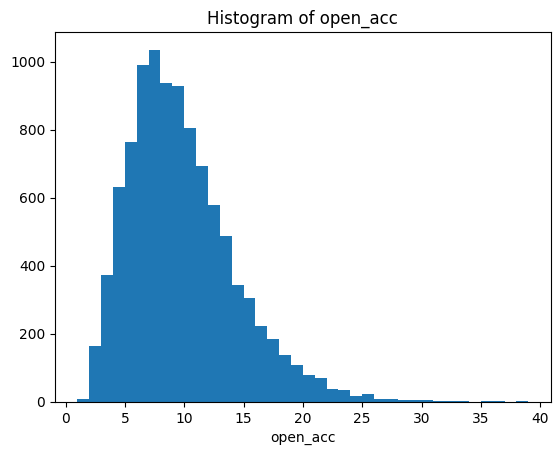

In [27]:
ax = df['open_acc'].hist(bins=38, grid=False) 
ax.set_xlabel('open_acc')
ax.set_title("Histogram of open_acc")

Text(0.5, 1.0, 'Histogram of revol_bal')

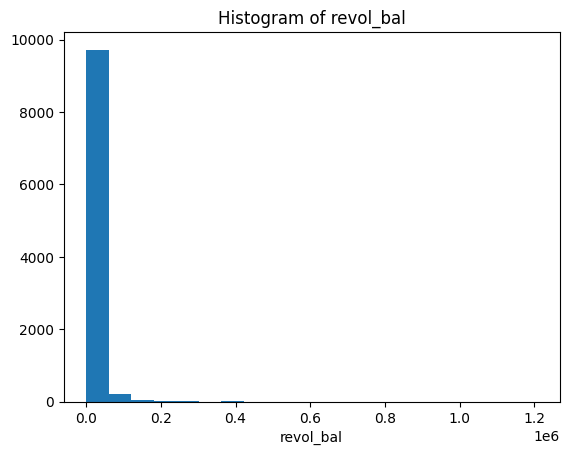

In [28]:
ax = df['revol_bal'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_bal')
ax.set_title("Histogram of revol_bal")

In [29]:
df[['revol_bal', 'annual_inc']].describe()

,revol_bal,annual_inc
count,1.000000e+04,9999.000000
mean,1.427101e+04,68203.011539
std,2.543791e+04,48590.252757
min,0.000000e+00,2000.000000
25%,3.524500e+03,40000.000000
50%,8.645500e+03,58000.000000
75%,1.695225e+04,82000.000000
max,1.207359e+06,900000.000000


Text(0.5, 1.0, 'Histogram of revol_util')

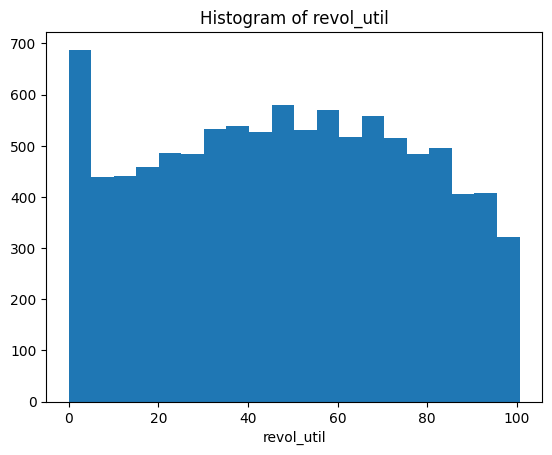

In [30]:
ax = df['revol_util'].hist(bins=20, grid=False) 
ax.set_xlabel('revol_util')
ax.set_title("Histogram of revol_util")

In [31]:
df[['revol_util', 'annual_inc']].describe()

,revol_util,annual_inc
count,9974.000000,9999.000000
mean,48.450771,68203.011539
std,28.220557,48590.252757
min,0.000000,2000.000000
25%,25.000000,40000.000000
50%,48.700000,58000.000000
75%,71.800000,82000.000000
max,100.600000,900000.000000


Text(0.5, 1.0, 'Histogram of delinq_2yrs')

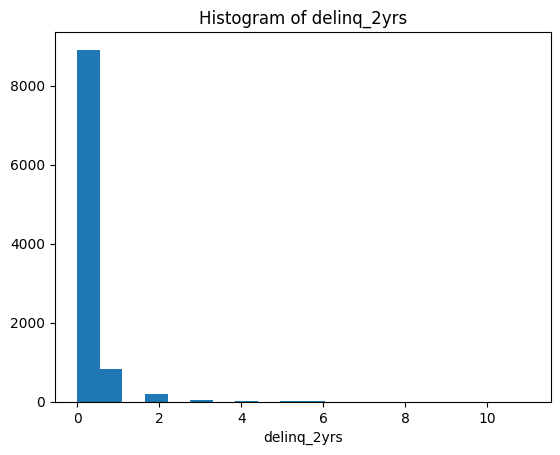

In [32]:
ax = df['delinq_2yrs'].hist(bins=20, grid=False) 
ax.set_xlabel('delinq_2yrs')
ax.set_title("Histogram of delinq_2yrs")

In [33]:
df[['delinq_2yrs', 'annual_inc']].describe()

,delinq_2yrs,annual_inc
count,9995.000000,9999.000000
mean,0.148174,68203.011539
std,0.506270,48590.252757
min,0.000000,2000.000000
25%,0.000000,40000.000000
50%,0.000000,58000.000000
75%,0.000000,82000.000000
max,11.000000,900000.000000


Text(0.5, 1.0, 'Histogram of inq_last_6mths')

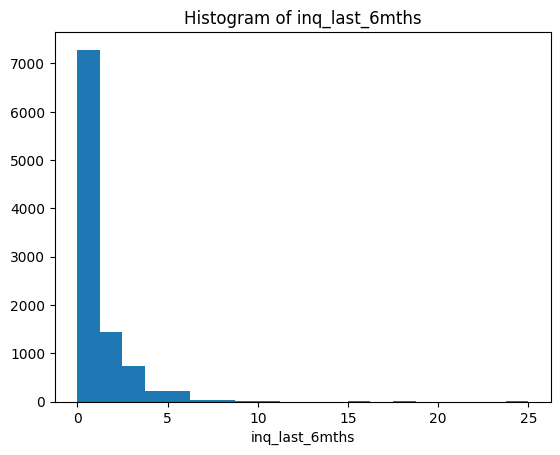

In [34]:
ax = df['inq_last_6mths'].hist(bins=20, grid=False) 
ax.set_xlabel('inq_last_6mths')
ax.set_title("Histogram of inq_last_6mths")

In [35]:
df[['inq_last_6mths', 'annual_inc']].describe()

,inq_last_6mths,annual_inc
count,9995.000000,9999.000000
mean,1.066933,68203.011539
std,1.476052,48590.252757
min,0.000000,2000.000000
25%,0.000000,40000.000000
50%,1.000000,58000.000000
75%,2.000000,82000.000000
max,25.000000,900000.000000


Text(0.5, 1.0, 'Histogram of mths_since_last_delinq')

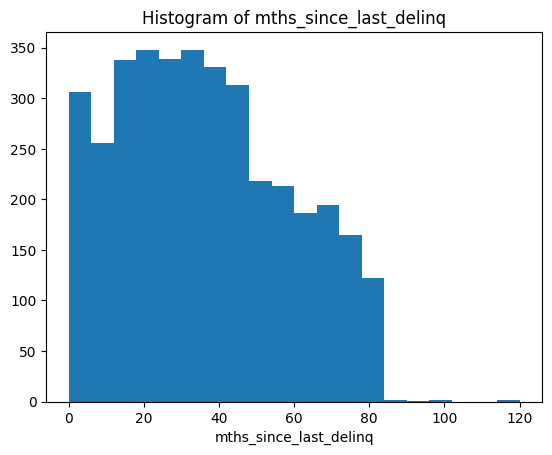

In [36]:
ax = df['mths_since_last_delinq'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_delinq')
ax.set_title("Histogram of mths_since_last_delinq")

In [37]:
df[['mths_since_last_delinq', 'annual_inc']].describe()

,mths_since_last_delinq,annual_inc
count,3684.000000,9999.000000
mean,35.890337,68203.011539
std,22.361443,48590.252757
min,0.000000,2000.000000
25%,18.000000,40000.000000
50%,34.000000,58000.000000
75%,53.000000,82000.000000
max,120.000000,900000.000000


Text(0.5, 1.0, 'Histogram of mths_since_last_record')

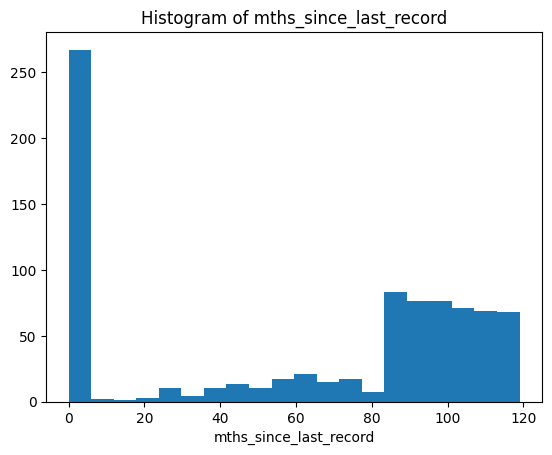

In [38]:
ax = df['mths_since_last_record'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_record')
ax.set_title("Histogram of mths_since_last_record")

In [39]:
df[['mths_since_last_record', 'annual_inc']].describe()

,mths_since_last_record,annual_inc
count,840.000000,9999.000000
mean,61.652381,68203.011539
std,46.189619,48590.252757
min,0.000000,2000.000000
25%,0.000000,40000.000000
50%,86.000000,58000.000000
75%,101.000000,82000.000000
max,119.000000,900000.000000


Text(0.5, 1.0, 'Histogram of pub_rec')

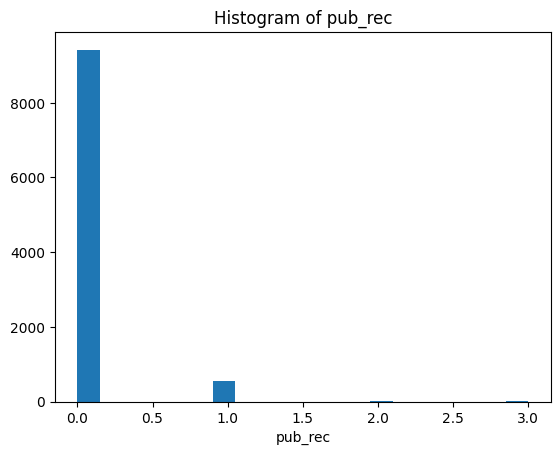

In [40]:
ax = df['pub_rec'].hist(bins=20, grid=False) 
ax.set_xlabel('pub_rec')
ax.set_title("Histogram of pub_rec")

In [41]:
df[['pub_rec', 'annual_inc']].describe()

,pub_rec,annual_inc
count,9995.000000,9999.000000
mean,0.060130,68203.011539
std,0.251245,48590.252757
min,0.000000,2000.000000
25%,0.000000,40000.000000
50%,0.000000,58000.000000
75%,0.000000,82000.000000
max,3.000000,900000.000000


Text(0.5, 1.0, 'Histogram of total_acc')

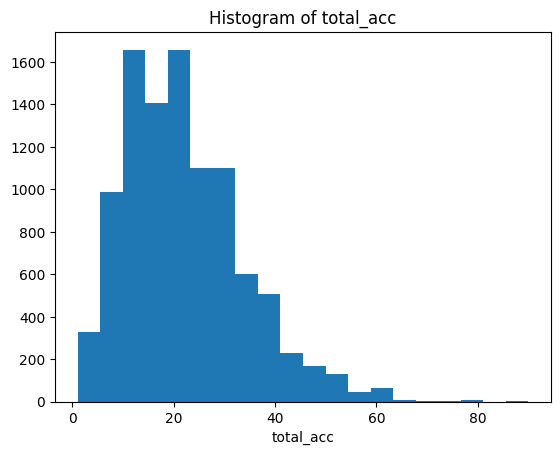

In [42]:
ax = df['total_acc'].hist(bins=20, grid=False) 
ax.set_xlabel('total_acc')
ax.set_title("Histogram of total_acc")

In [43]:
df[['total_acc', 'annual_inc']].describe()

,total_acc,annual_inc
count,9995.000000,9999.000000
mean,22.011306,68203.011539
std,11.709400,48590.252757
min,1.000000,2000.000000
25%,13.000000,40000.000000
50%,20.000000,58000.000000
75%,29.000000,82000.000000
max,90.000000,900000.000000


Text(0.5, 1.0, 'Histogram of mths_since_last_major_derog')

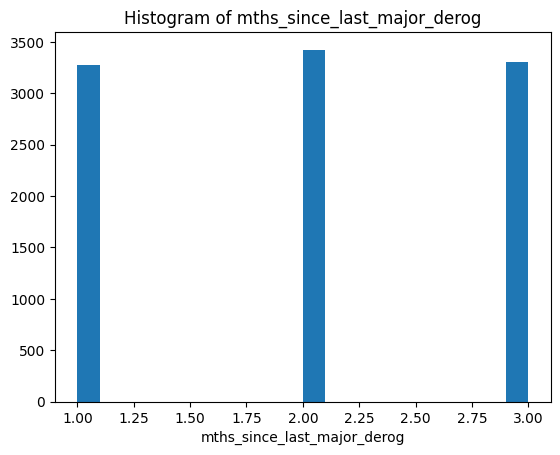

In [44]:
ax = df['mths_since_last_major_derog'].hist(bins=20, grid=False) 
ax.set_xlabel('mths_since_last_major_derog')
ax.set_title("Histogram of mths_since_last_major_derog")

Take a look at how many months since the last major derogatory note was made on this loan.

In [45]:
df[['mths_since_last_major_derog', 'annual_inc']].describe()

,mths_since_last_major_derog,annual_inc
count,10000.000000,9999.000000
mean,2.002200,68203.011539
std,0.810963,48590.252757
min,1.000000,2000.000000
25%,1.000000,40000.000000
50%,2.000000,58000.000000
75%,3.000000,82000.000000
max,3.000000,900000.000000


# Correlation

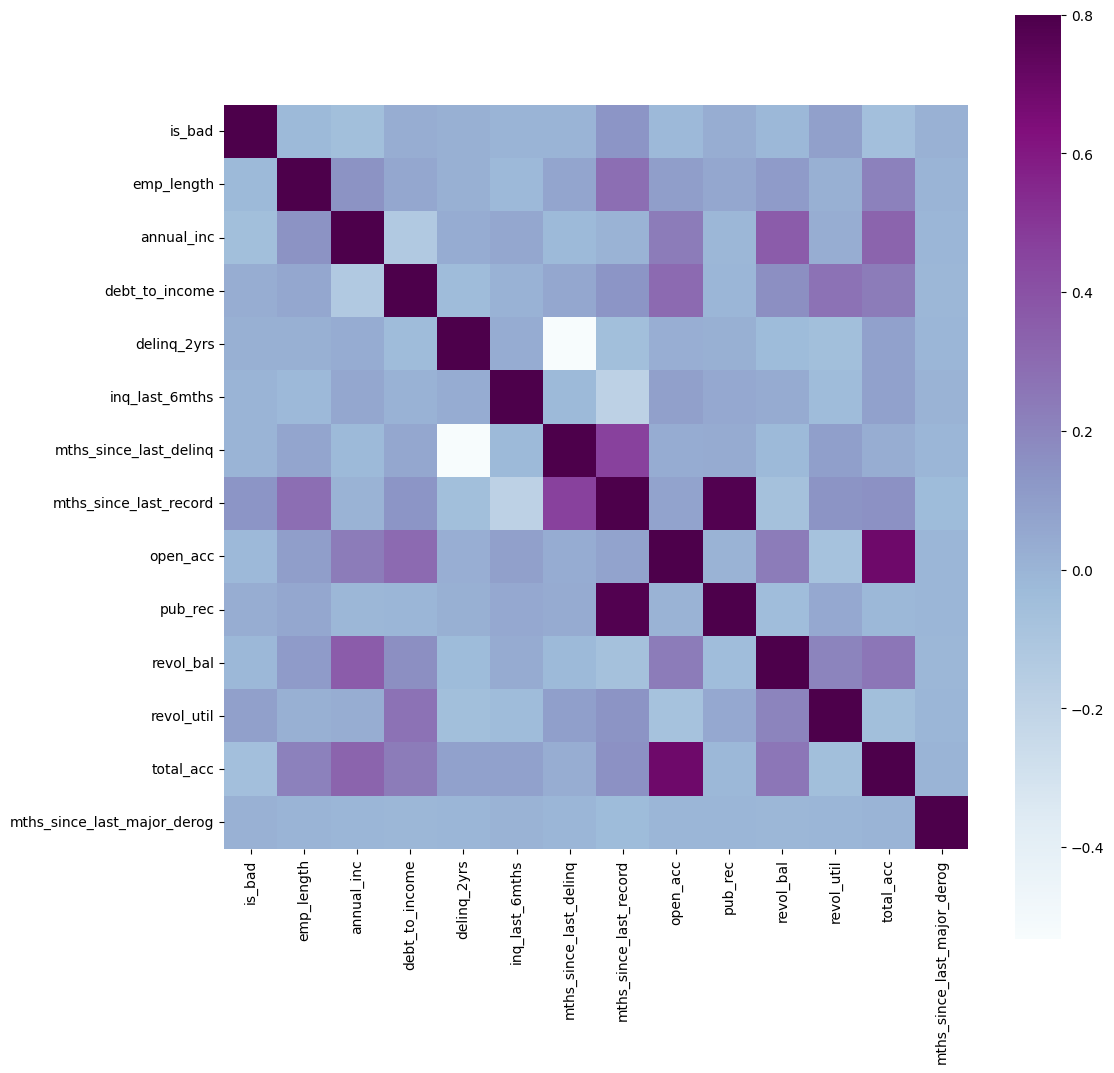

In [50]:
#mw.correlation_matrix(df, cluster=False)
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = df.corr()
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix,vmax=0.8,square=True,cmap="BuPu")
plt.show()

In [51]:
def expand_year(x):
    """Converts YY -> YYYY

    Assumes there are no records in the current year, which will be returned as-is
    """
    this_year = datetime.datetime.now().strftime("%y")
    if int(x[::-1][:2][::-1]) < int(this_year):
        return x[0:len(x) - 2] + "20" + x[len(x) - 2:]
    elif int(x[::-1][:2][::-1]) > int(this_year):
        return x[0:len(x) - 2] + "19" + x[len(x) - 2:]
    else:
        return x

In [52]:
earliest_cr = df.earliest_cr_line.dropna()
earliest_cr = earliest_cr.astype(str)
earliest_cr = pd.to_datetime(earliest_cr.apply(lambda x: expand_year(x)))
earliest_cr_line_yr = earliest_cr.dt.year
earliest_cr_line_yr = earliest_cr_line_yr.astype(int)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '1950'),
  Text(1, 0, '1956'),
  Text(2, 0, '1959'),
  Text(3, 0, '1962'),
  Text(4, 0, '1963'),
  Text(5, 0, '1964'),
  Text(6, 0, '1965'),
  Text(7, 0, '1966'),
  Text(8, 0, '1967'),
  Text(9, 0, '1968'),
  Text(10, 0, '1969'),
  Text(11, 0, '1970'),
  Text(12, 0, '1971'),
  Text(13, 0, '1972'),
  Text(14, 0, '1973'),
  Text(15, 0, '1974'),
  Text(16, 0, '1975'),
  Text(17, 0, '1976'),
  Text(18, 0, '1977'),
  Text(19, 0, '1978'),
  Text(20, 0, '1979'),
  Text(21, 0, '1980'),
  Text(22, 0, '1981'),
  Text(23, 0, '1982'),
  Text(24, 0, '1983'),
  Text(25, 0, '1984'),
  Text(26, 0, '1985'),
  Text(27, 0, '1986'),
  Text(28, 0, '1987'),
  Text(29, 0, '1988'),
  Text(30, 0, '1989'),
  Text(31, 0, '1990'),
  Text(32, 0, '1991'),
  Text(33, 0, '1992'),
  

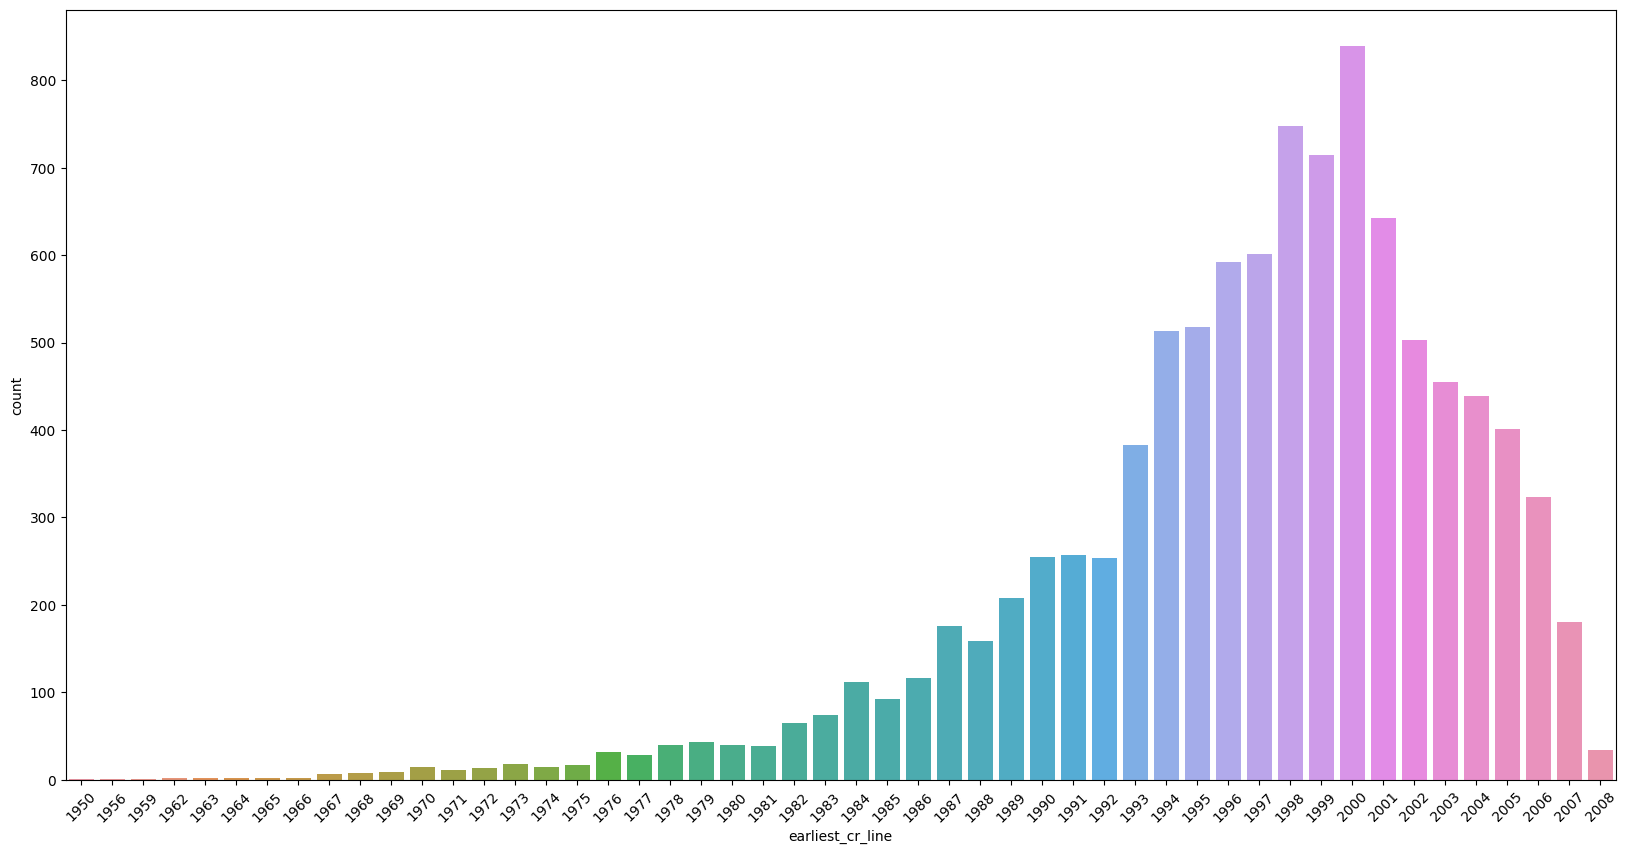

In [53]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='earliest_cr_line', data=pd.DataFrame(earliest_cr_line_yr))
plt.xticks(rotation=45)

# Feature Importance

In [ ]:
mw.importance(df, "is_bad", truncate=False)

# Scatter plots

In [ ]:
num_cols =  df.columns[df.dtypes=='float'].tolist()
num_cols = num_cols+['is_bad']
sns.pairplot(df[pair_plot_col],hue='is_bad')

In [57]:
df.dtypes

is_bad                            int64
emp_length                      float64
home_ownership                 category
annual_inc                      float64
verification_status            category
purpose_cat                    category
addr_state                     category
debt_to_income                  float64
delinq_2yrs                     float64
earliest_cr_line                 object
inq_last_6mths                  float64
mths_since_last_delinq          float64
mths_since_last_record          float64
open_acc                        float64
pub_rec                         float64
revol_bal                       float64
revol_util                      float64
total_acc                       float64
mths_since_last_major_derog       int64
policy_code                    category
dtype: object

In [54]:
object_cols=df.columns[df.dtypes=='object'].tolist()
cat_cols = df.columns[df.dtypes=='category'].tolist()
cat_cols= object_cols+ cat_cols

11/1/00    95
11/1/98    95
12/1/98    91
10/1/98    86
10/1/99    84
           ..
6/1/67      1
12/1/75     1
3/1/77      1
9/1/73      1
7/1/08      1
Name: earliest_cr_line, Length: 463, dtype: int64


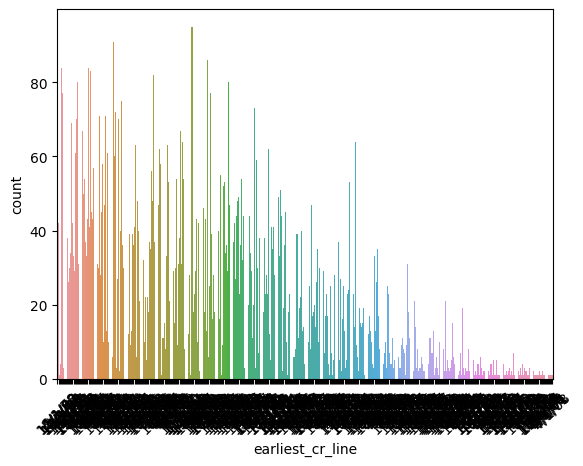


RENT        4745
MORTGAGE    4445
OWN          775
OTHER         34
NONE           1
Name: home_ownership, dtype: int64


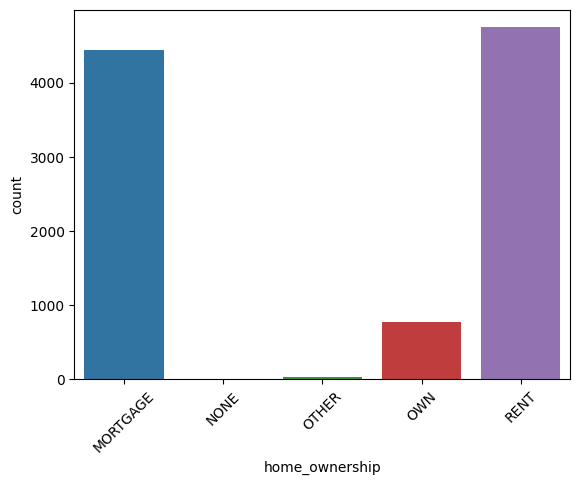


not verified                4367
VERIFIED - income           3214
VERIFIED - income source    2419
Name: verification_status, dtype: int64


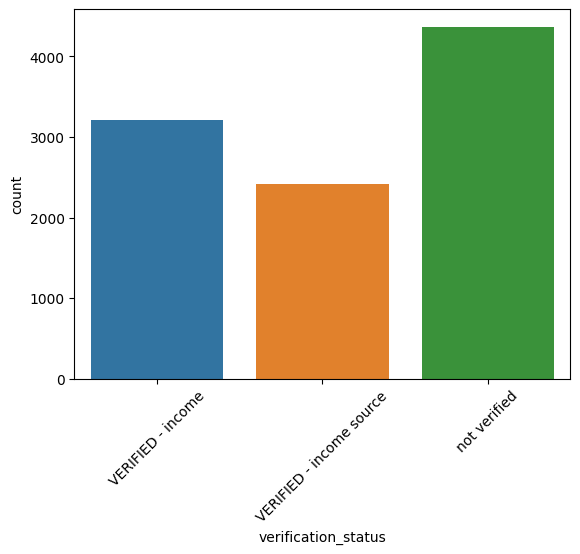


debt consolidation                   4454
credit card                          1273
other                                1026
home improvement                      800
major purchase                        546
small business                        461
car                                   349
wedding                               250
medical                               183
moving                                159
educational                           107
debt consolidation small business     102
house                                  94
vacation                               94
renewable energy                       19
other small business                   18
credit card small business             17
small business small business          12
home improvement small business        11
major purchase small business           5
educational small business              5
moving small business                   3
car small business                      3
house small business             

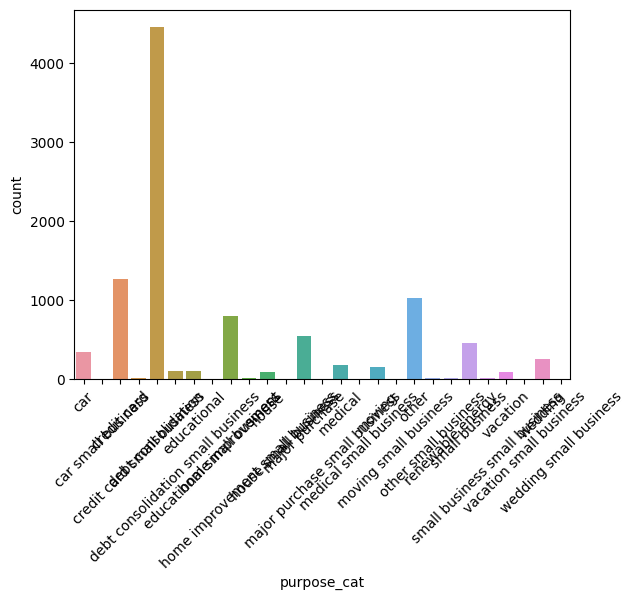


CA    1748
NY     958
FL     714
TX     700
NJ     482
VA     392
IL     386
PA     378
GA     357
MA     331
OH     292
MD     282
WA     217
AZ     210
CT     195
NC     194
MI     176
CO     175
MO     167
MN     136
SC     126
WI     124
AL     119
NV     114
OR     109
KY     103
OK      98
LA      97
UT      68
KS      57
DC      54
RI      53
NH      50
AR      48
WV      45
NM      43
DE      35
HI      32
AK      26
MT      25
WY      23
SD      19
VT      18
MS       9
TN       5
NE       3
IN       3
IA       2
ME       1
ID       1
Name: addr_state, dtype: int64


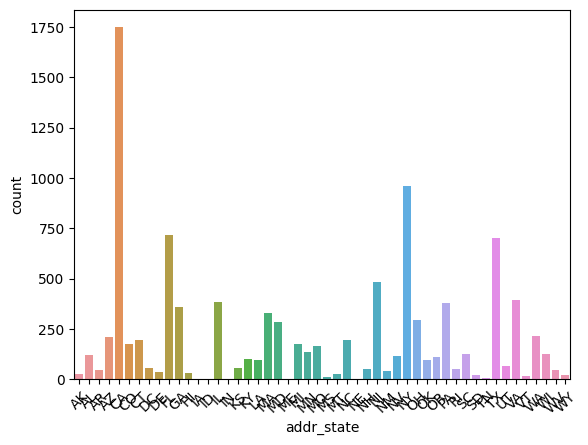


PC3    2098
PC5    2025
PC1    1978
PC2    1962
PC4    1937
Name: policy_code, dtype: int64


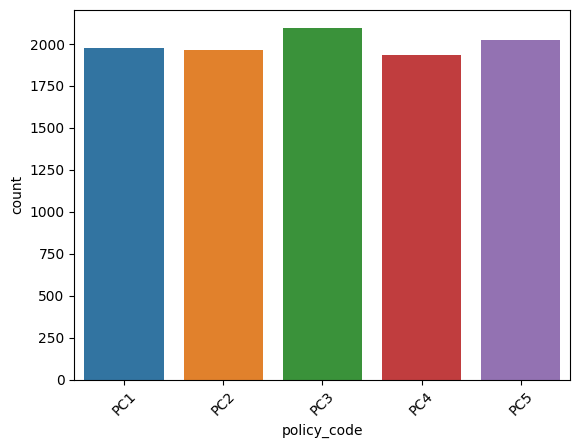

In [55]:
for col in cat_cols:
    print(df[col].value_counts())
    plot=sns.countplot(x=col,data=df)
    plt.setp(plot.get_xticklabels(), rotation=45)
    plt.show()
   
    print()

 Bar plot of  earliest_cr_line  by is_bad


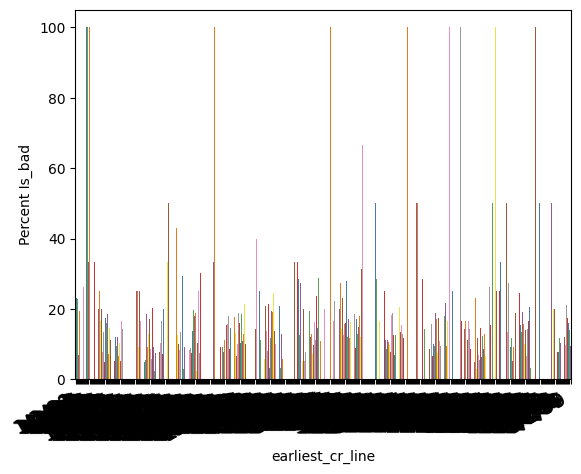


 Bar plot of  home_ownership  by is_bad


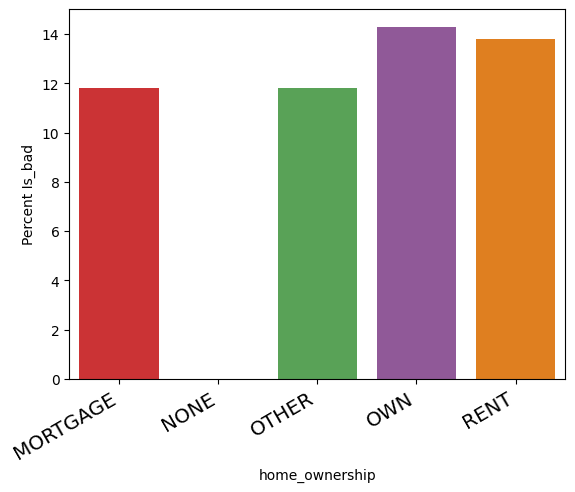


 Bar plot of  verification_status  by is_bad


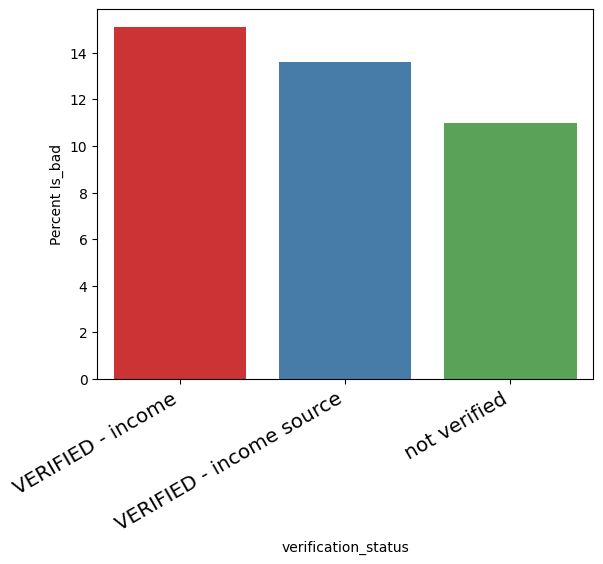


 Bar plot of  purpose_cat  by is_bad


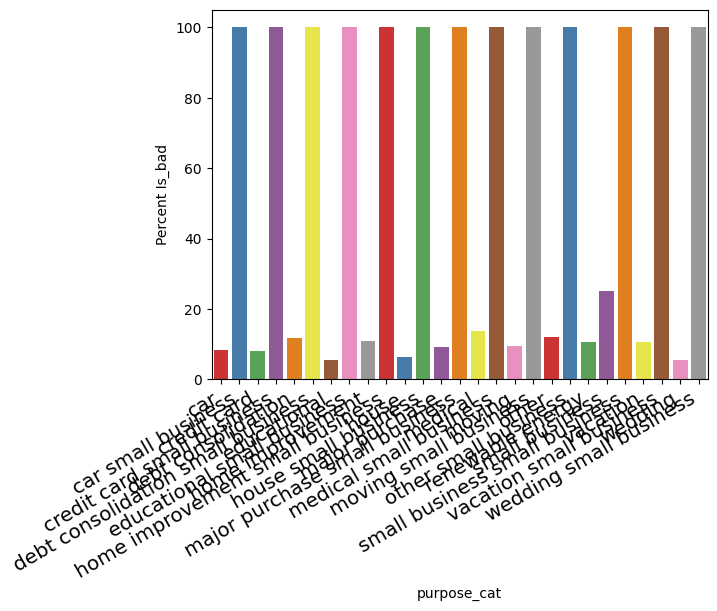


 Bar plot of  addr_state  by is_bad


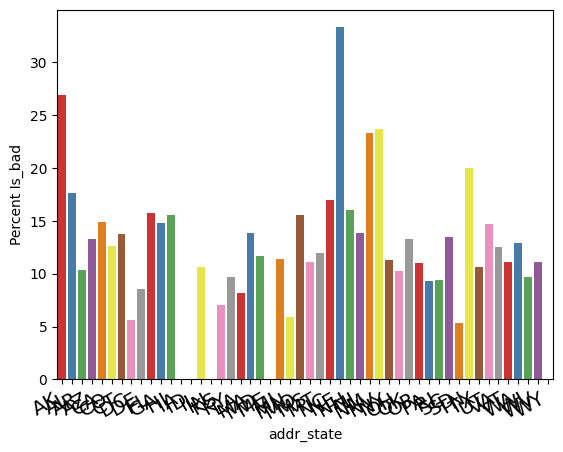


 Bar plot of  policy_code  by is_bad


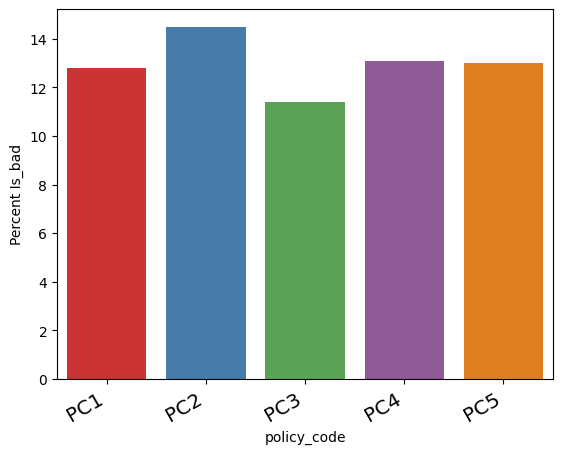

In [56]:
for col in cat_cols:

    cross_tb = pd.crosstab(df[col],df['is_bad'],margins=True) # Name the count column
   
    cross_tb['Percent Is_bad']= round(100*(cross_tb[1]/cross_tb['All']),1)
    cross_tb.reset_index(inplace=True)
    cross_tb=cross_tb.loc[cross_tb[col]!='All',]
    order_list=cross_tb[col].to_list()
    print( " Bar plot of ", col," by is_bad")
    sns.barplot(x=col, y='Percent Is_bad',order=order_list,data=cross_tb, palette="Set1")
    plt.xticks(
    rotation=30,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large' )
   
    plt.show()
   
    print()

# Explore clustering

In [ ]:
mw.data_summary(clusters_df.loc[clusters_df.cluster == 0])

In [ ]:
mw.data_summary(clusters_df.loc[clusters_df.cluster == 1])